In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_1 = pd.read_csv("heart_attack_prediction_dataset.csv")

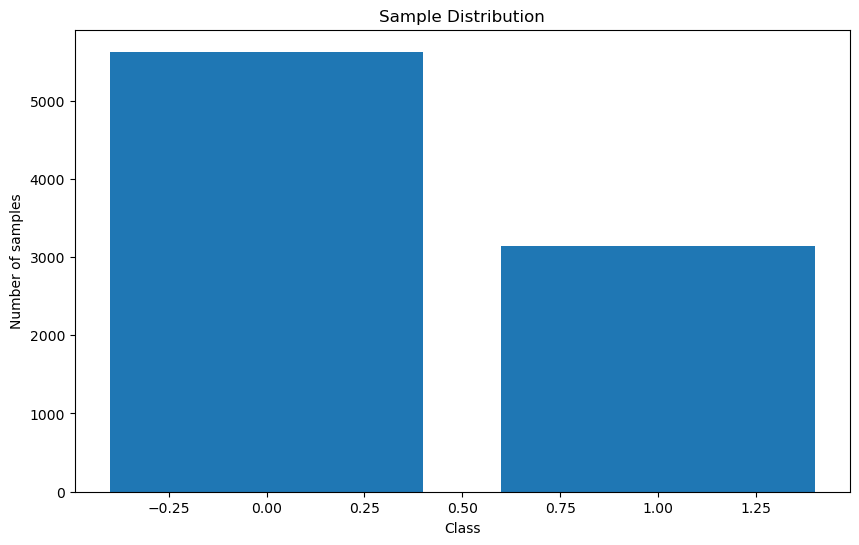

In [3]:
class_counts = df_1['Heart Attack Risk'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Sample Distribution')
plt.show()

In [4]:
df_2 = pd.read_csv("Employee.csv")

## Pre-processing

### Dataframe 1

In [6]:
df_1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
le = LabelEncoder()

In [8]:
df_1['Sex'] = le.fit_transform(df_1['Sex'])
df_1['Diet'] = le.fit_transform(df_1['Diet'])
df_1['Country'] = le.fit_transform(df_1['Country'])
df_1['Continent'] = le.fit_transform(df_1['Continent'])
df_1['Hemisphere'] = le.fit_transform(df_1['Hemisphere'])

df_1[['systolic_bp', 'diastolic_bp']] = df_1['Blood Pressure'].str.split('/', expand=True).astype(int)

df_1 = df_1.drop('Patient ID', axis=1)

df_1 = df_1.drop('Blood Pressure', axis=1)

target = df_1.pop('Heart Attack Risk')
df_1.insert(len(df_1.columns) - 1, 'Heart Attack Risk', target)

target = df_1.pop('diastolic_bp')
df_1.insert(len(df_1.columns) - 1, 'diastolic_bp', target)

In [9]:
df_1.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,systolic_bp,diastolic_bp,Heart Attack Risk
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,158,88,0
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,165,93,0
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,174,99,0
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,163,100,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,91,88,0


In [10]:
fd_missing=df_1.isna()
fd_missing_num=fd_missing.sum()
fd_missing_num

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
systolic_bp                        0
diastolic_bp                       0
Heart Attack Risk                  0
dtype: int64

In [11]:
df_1.shape

(8763, 26)

In [12]:
df_missing=df_1.isna()
df_missing_num=df_missing.sum()
df_missing_num

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
systolic_bp                        0
diastolic_bp                       0
Heart Attack Risk                  0
dtype: int64

### Dataframe 2

In [13]:
df_2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [14]:
df_2['Education'] = le.fit_transform(df_2['Education'])
df_2['City'] = le.fit_transform(df_2['City'])
df_2['Gender'] = le.fit_transform(df_2['Gender'])
df_2['EverBenched'] = le.fit_transform(df_2['EverBenched'])

In [15]:
df_2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [16]:
df_missing=df_2.isna()
df_missing_num=df_missing.sum()
df_missing_num

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [17]:
df_2.shape

(4653, 9)

## Identifying and addressing imbalance

In [18]:
class_distribution_1=df_1['Heart Attack Risk'].value_counts()
print(class_distribution_1)

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [19]:
class_distribution_2=df_2['LeaveOrNot'].value_counts()
print(class_distribution_2)

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


In [20]:
X1 = df_1.iloc[:,:-1]
y1 = df_1['Heart Attack Risk']


X2 = df_2.iloc[:,:-1]
y2 = df_2['LeaveOrNot']

In [21]:
X1, y1

(      Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
 0      67    1          208          72         0               0        1   
 1      21    1          389          98         1               1        1   
 2      21    0          324          72         1               0        0   
 3      84    1          383          73         1               1        1   
 4      66    1          318          93         1               1        1   
 ...   ...  ...          ...         ...       ...             ...      ...   
 8758   60    1          121          61         1               1        1   
 8759   28    0          120          73         1               0        0   
 8760   47    1          250         105         0               1        1   
 8761   36    1          178          60         1               0        1   
 8762   25    0          356          75         1               1        0   
 
       Obesity  Alcohol Consumption  Exercise Hour

In [22]:
X2, y2

(      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
 0             0         2017     0            3   34       1            0   
 1             0         2013     2            1   28       0            0   
 2             0         2014     1            3   38       0            0   
 3             1         2016     0            3   27       1            0   
 4             1         2017     2            3   24       1            1   
 ...         ...          ...   ...          ...  ...     ...          ...   
 4648          0         2013     0            3   26       0            0   
 4649          1         2013     2            2   37       1            0   
 4650          1         2018     1            3   27       1            0   
 4651          0         2012     0            3   30       1            1   
 4652          0         2015     0            3   33       1            1   
 
       ExperienceInCurrentDomain  
 0                         

In [92]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=43)

X1_train, y1_train = smote.fit_resample(X1_train, y1_train)
X2_train, y2_train = smote.fit_resample(X2_train, y2_train)

In [145]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Decision Tree

### Dataset 1

In [382]:
start_time = time.perf_counter()

In [383]:
dtree_1=DecisionTreeClassifier(criterion='entropy',max_depth=24,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,random_state=43,splitter='best')
dtree_1.fit(X1_train,y1_train)
dtree_1_pred=dtree_1.predict(X1_test)
print(classification_report(y1_test,dtree_1_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1415
           1       0.33      0.27      0.30       776

    accuracy                           0.55      2191
   macro avg       0.48      0.49      0.48      2191
weighted avg       0.53      0.55      0.54      2191


In [384]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 0.8959 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

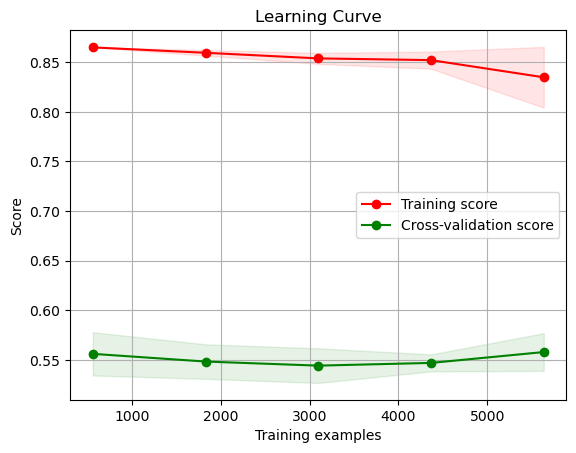

In [385]:
def plot_learning_curve(dtree_1, title, X1, y1, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        dtree_1, X1, y1, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(dtree_1, "Learning Curve", X1_train, y1_train, cv=7)

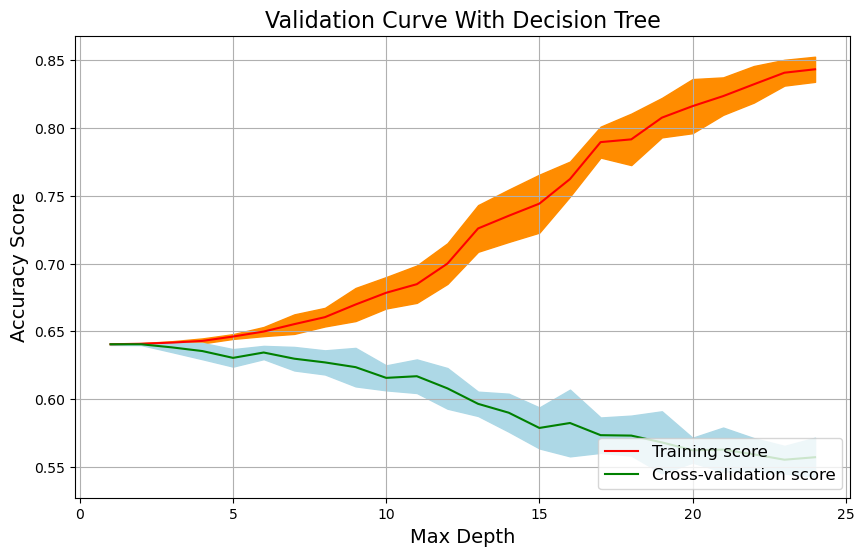

In [123]:
param_range = np.arange(1, 25, 1)
train_scores, test_scores = validation_curve(dtree_1, X1_train, y1_train, param_name="max_depth", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Decision Tree", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

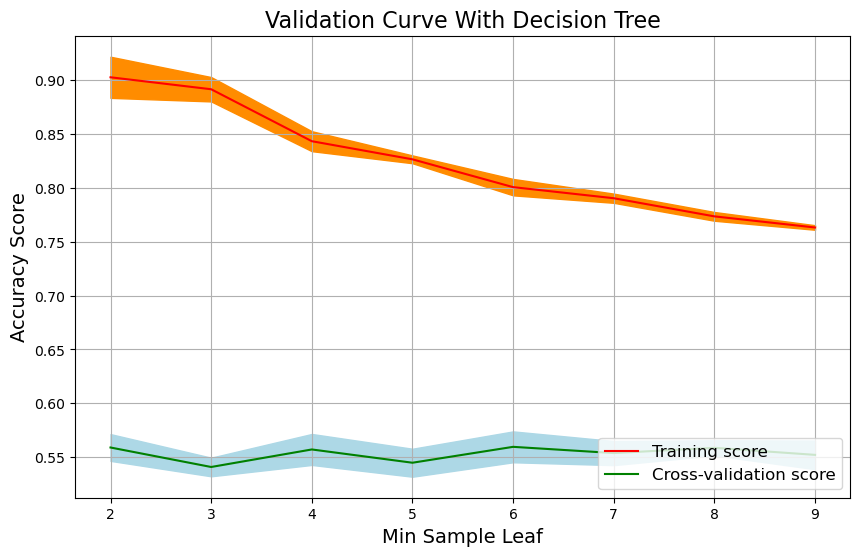

In [124]:
param_range = np.arange(2, 10, 1)
train_scores, test_scores = validation_curve(dtree_1, X1_train, y1_train, param_name="min_samples_leaf", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Decision Tree", fontsize=16)
plt.xlabel("Min Sample Leaf", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


### Dataset 2

In [125]:
start_time = time.perf_counter()

In [378]:
dtree_2=DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=43,splitter='best')
dtree_2.fit(X2_train,y2_train)
dtree_2_pred=dtree_2.predict(X2_test)
print(classification_report(y2_test,dtree_2_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       775
           1       0.90      0.59      0.71       389

    accuracy                           0.84      1164
   macro avg       0.86      0.78      0.80      1164
weighted avg       0.85      0.84      0.83      1164


In [127]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 10.4382 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

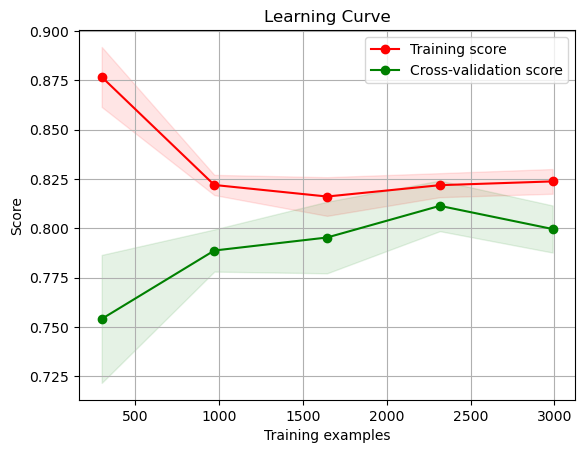

In [139]:
def plot_learning_curve(dtree_2, title, X2, y2, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        dtree_2, X2, y2, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(dtree_2, "Learning Curve", X2_train, y2_train, cv=7)

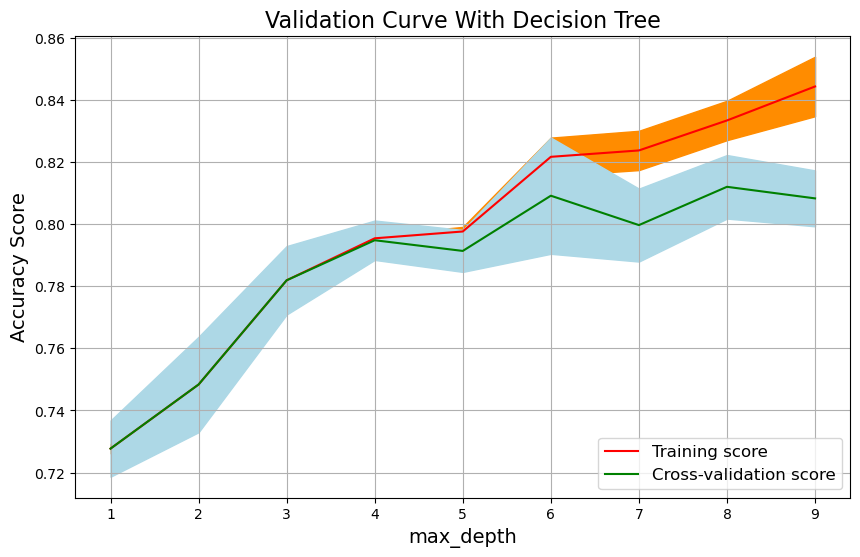

In [376]:
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(dtree_2, X2_train, y2_train, param_name="max_depth", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Decision Tree", fontsize=16)
plt.xlabel("max_depth", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


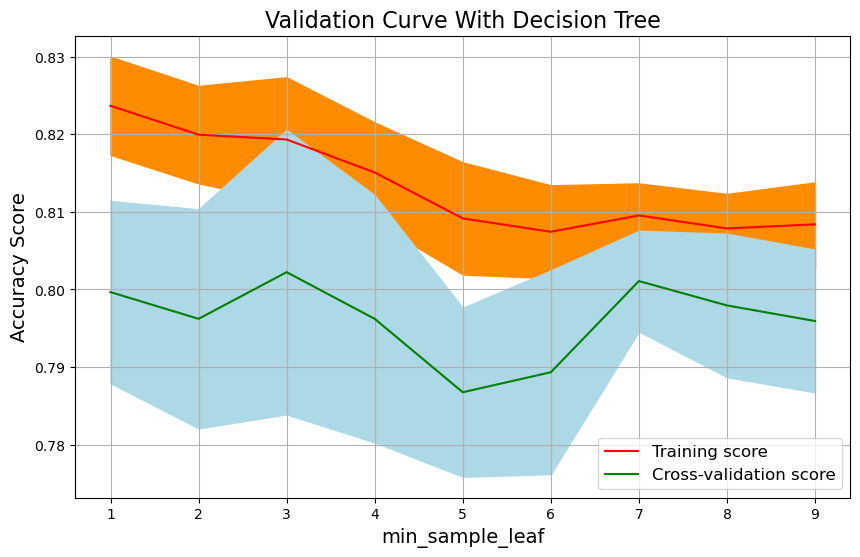

In [377]:
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(dtree_2, X2_train, y2_train, param_name="min_samples_leaf", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Decision Tree", fontsize=16)
plt.xlabel("min_sample_leaf", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


# Neural Networks (Multi Layer Perceptron)

### Dataset 1

In [386]:
start_time = time.perf_counter()

In [387]:
nn_1=MLPClassifier(activation='identity', alpha=0.2, hidden_layer_sizes=(10,100,1000), learning_rate_init=1, solver='adam', random_state=42, max_iter=10000)
nn_1.fit(X1_train,y1_train)
nn_1_pred=nn_1.predict(X1_test)
print(classification_report(y1_test,nn_1_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1415
           1       0.33      0.24      0.28       776

    accuracy                           0.56      2191
   macro avg       0.48      0.49      0.48      2191
weighted avg       0.53      0.56      0.54      2191


In [388]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 40.6462 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

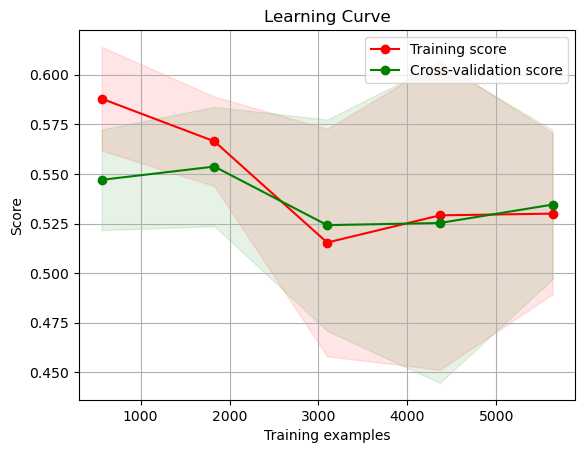

In [190]:
def plot_learning_curve(nn_1, title, X1, y1, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        nn_1, X1, y1, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(nn_1, "Learning Curve", X1_train, y1_train, cv=7)

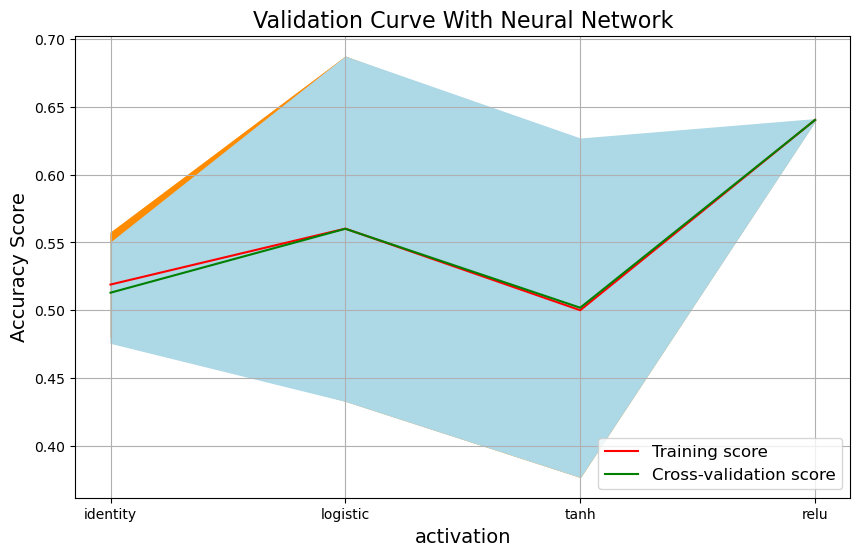

In [191]:
param_range = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(nn_1, X1_train, y1_train, param_name="activation", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Neural Network", fontsize=16)
plt.xlabel("activation", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


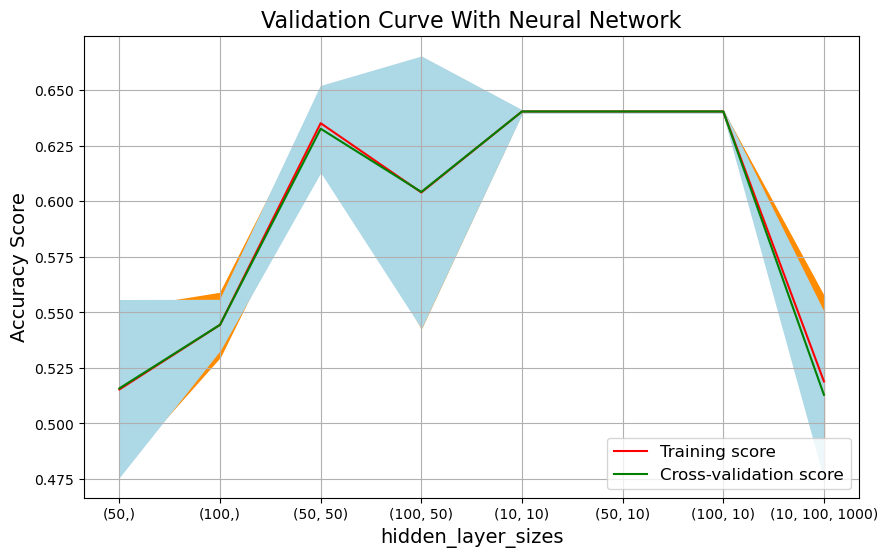

In [404]:
from sklearn.model_selection import validation_curve

param_range = [(50,), (100,), (50, 50), (100, 50), (10, 10), (50, 10), (100, 10), (10,100,1000)]
train_scores, test_scores = validation_curve(nn_1, X1_train, y1_train, param_name="hidden_layer_sizes", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Convert param_range tuples to strings for plotting
param_range_str = [str(param) for param in param_range]

plt.figure(figsize=(10, 6))
plt.plot(param_range_str, train_mean, label="Training score", color="red")
plt.fill_between(param_range_str, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range_str, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range_str, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Neural Network", fontsize=16)
plt.xlabel("hidden_layer_sizes", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


### Dataset 2

In [389]:
start_time = time.perf_counter()

In [390]:
nn_2=MLPClassifier(activation='identity', alpha=0.7, hidden_layer_sizes=(100,50), learning_rate_init=1, solver='adam', random_state=42, max_iter=10000)
nn_2.fit(X2_train,y2_train)
nn_2_pred=nn_2.predict(X2_test)
print(classification_report(y2_test,nn_2_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       775
           1       0.65      0.35      0.46       389

    accuracy                           0.72      1164
   macro avg       0.69      0.63      0.63      1164
weighted avg       0.71      0.72      0.69      1164


In [391]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 1.7674 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

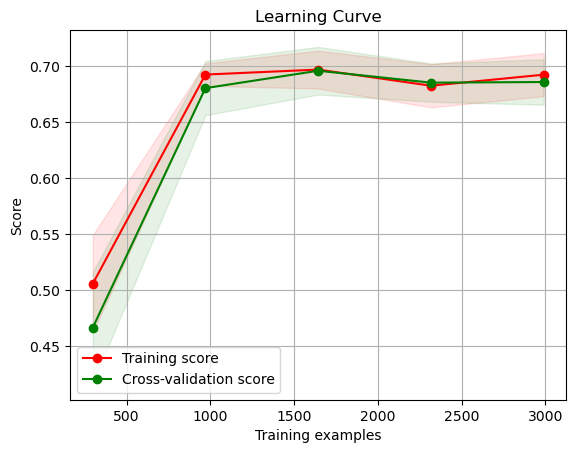

In [223]:
def plot_learning_curve(nn_2, title, X2, y2, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        nn_2, X2, y2, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(nn_2, "Learning Curve", X2_train, y2_train, cv=7)

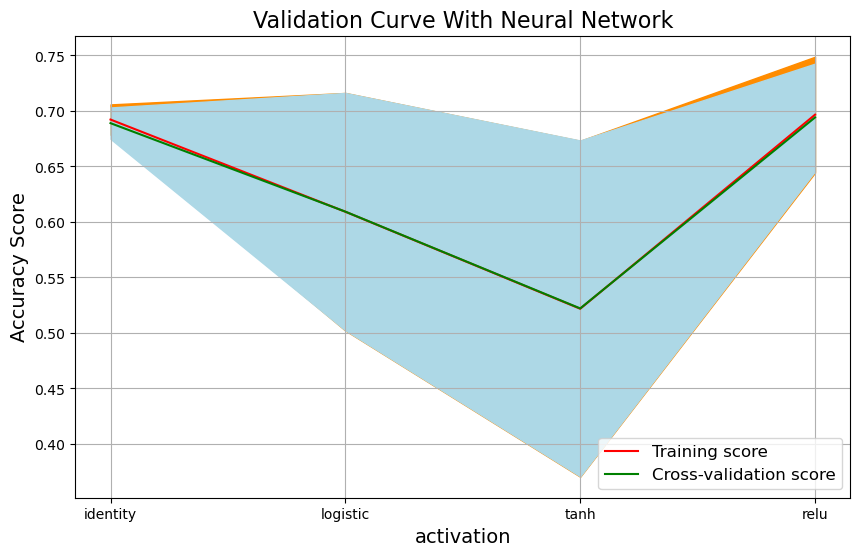

In [224]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(nn_2, X2_train, y2_train, param_name="activation", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Neural Network", fontsize=16)
plt.xlabel("activation", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


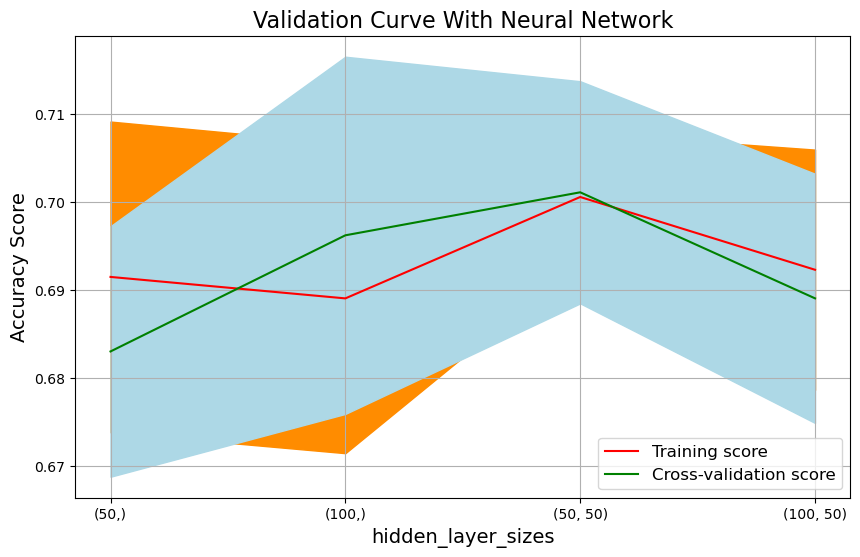

In [405]:
param_range = [(50,), (100,), (50, 50), (100, 50)]
train_scores, test_scores = validation_curve(nn_2, X2_train, y2_train, param_name="hidden_layer_sizes", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Convert param_range tuples to strings for plotting
param_range_str = [str(param) for param in param_range]

plt.figure(figsize=(10, 6))
plt.plot(param_range_str, train_mean, label="Training score", color="red")
plt.fill_between(param_range_str, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range_str, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range_str, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Neural Network", fontsize=16)
plt.xlabel("hidden_layer_sizes", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


# KNN

### Dataset 1

In [392]:
start_time = time.perf_counter()

In [393]:
knn_1 = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=7,p=2)
knn_1.fit(X1_train, y1_train)
knn_1_pred = knn_1.predict(X1_test)
print(classification_report(y1_test, knn_1_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1415
           1       0.37      0.25      0.29       776

    accuracy                           0.58      2191
   macro avg       0.51      0.51      0.50      2191
weighted avg       0.55      0.58      0.56      2191


In [394]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 1.0636 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

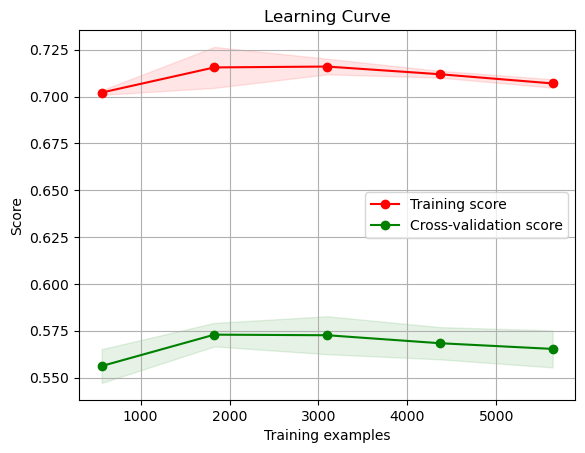

In [275]:
def plot_learning_curve(knn_1, title, X1, y1, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
    knn_1, X1, y1, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(knn_1, "Learning Curve", X1_train, y1_train, cv=7)

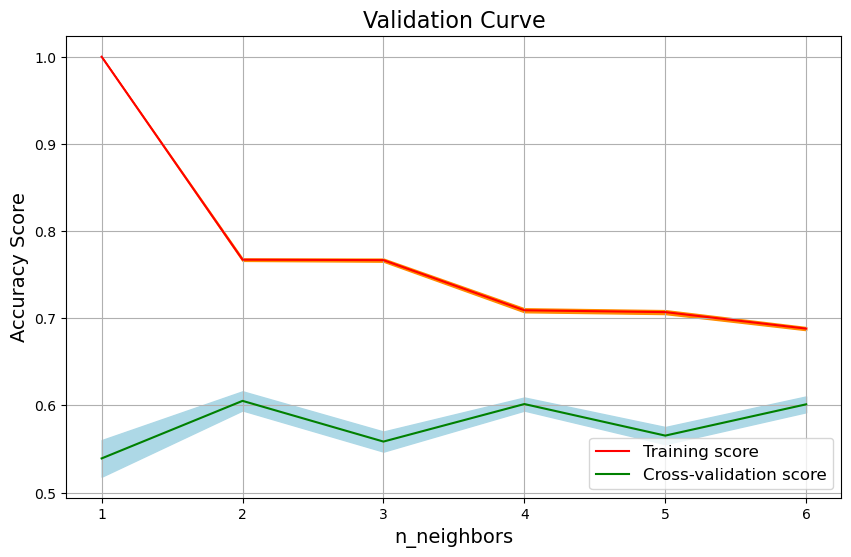

In [406]:
param_range = np.arange(1, 7, 1)
train_scores, test_scores = validation_curve(knn_1, X1_train, y1_train, param_name="n_neighbors", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("n_neighbors", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

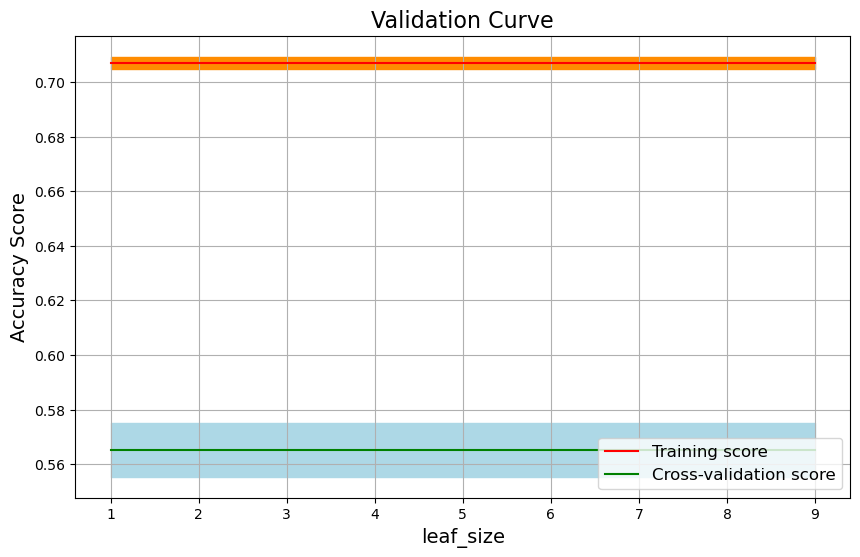

In [407]:
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(knn_1, X1_train, y1_train, param_name="leaf_size", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("leaf_size", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

### Dataset 2

In [278]:
start_time = time.perf_counter()

In [281]:
knn_2 = KNeighborsClassifier(n_neighbors=5,p=1,leaf_size=2)
knn_2.fit(X2_train, y2_train)
knn_2_pred = knn_2.predict(X2_test)
print(classification_report(y2_test, knn_2_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       775
           1       0.84      0.64      0.73       389

    accuracy                           0.84      1164
   macro avg       0.84      0.79      0.81      1164
weighted avg       0.84      0.84      0.83      1164


In [282]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 97.7759 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

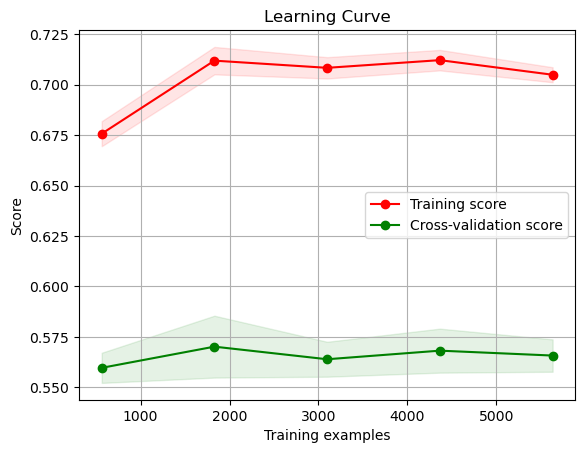

In [283]:
def plot_learning_curve(knn_1, title, X2, y2, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        knn_2, X2, y2, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(knn_2, "Learning Curve", X1_train, y1_train, cv=7)

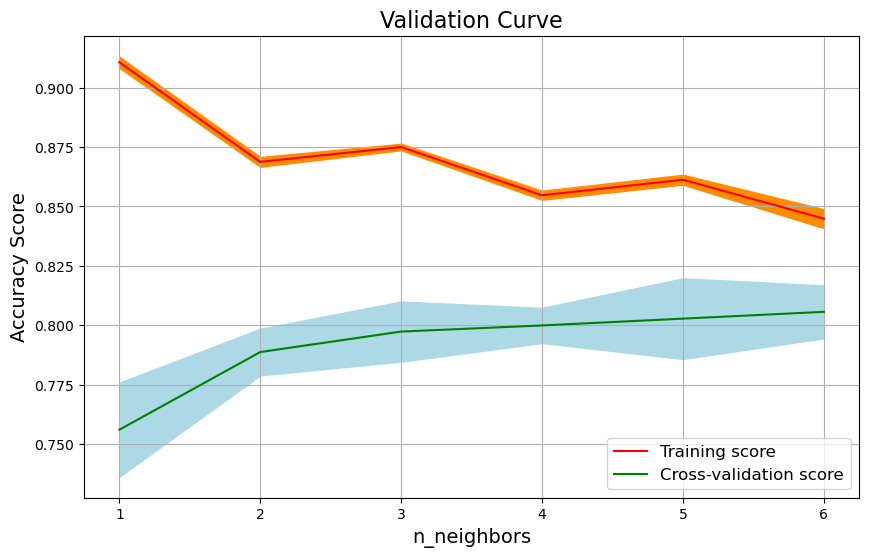

In [408]:
param_range = np.arange(1, 7, 1)
train_scores, test_scores = validation_curve(knn_2, X2_train, y2_train, param_name="n_neighbors", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("n_neighbors", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

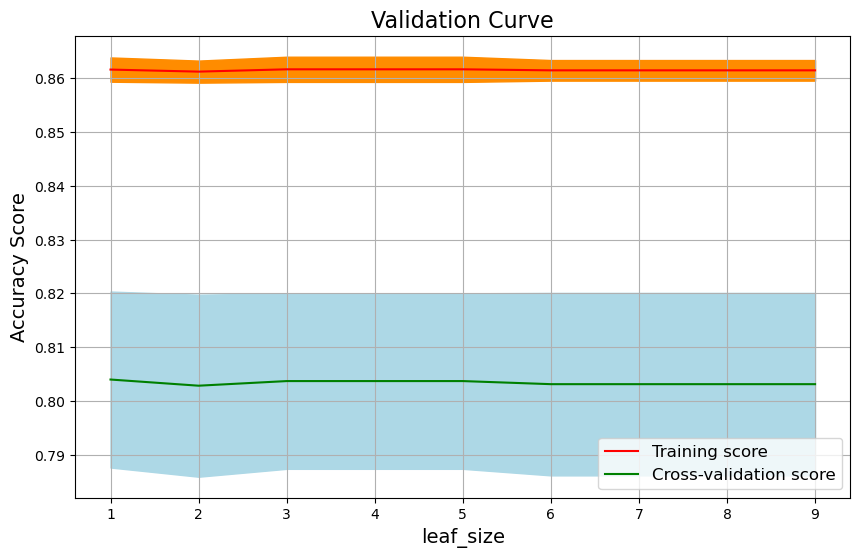

In [417]:
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(knn_2, X2_train, y2_train, param_name="leaf_size", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("leaf_size", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# Boosted Decision Tree

### Dataset 1

In [395]:
start_time = time.perf_counter()

In [396]:
bdt_1 = GradientBoostingClassifier(n_estimators=300,learning_rate=0.7,max_depth=300,min_samples_leaf=6,subsample=0.9)
bdt_1.fit(X1_train, y1_train)
bdt_1_pred = bdt_1.predict(X1_test)
print("Boosted Decision Tree:", classification_report(y1_test, bdt_1_pred))

Boosted Decision Tree:               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1415
           1       0.37      0.17      0.23       776

    accuracy                           0.60      2191
   macro avg       0.51      0.51      0.48      2191
weighted avg       0.55      0.60      0.55      2191


In [397]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 16.2694 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

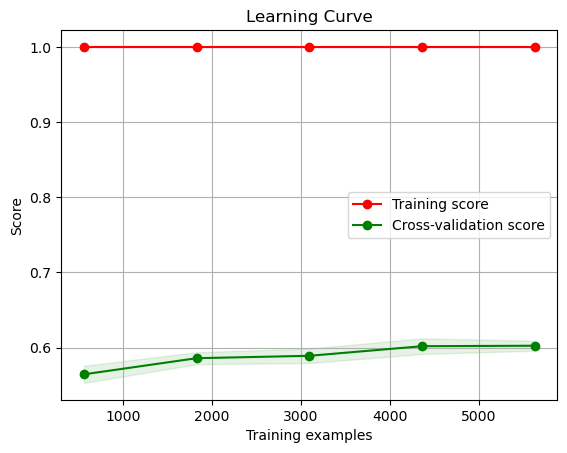

In [357]:
def plot_learning_curve(bdt_1, title, X1, y1, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        bdt_1, X1, y1, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(bdt_1, "Learning Curve", X1_train, y1_train, cv=7)

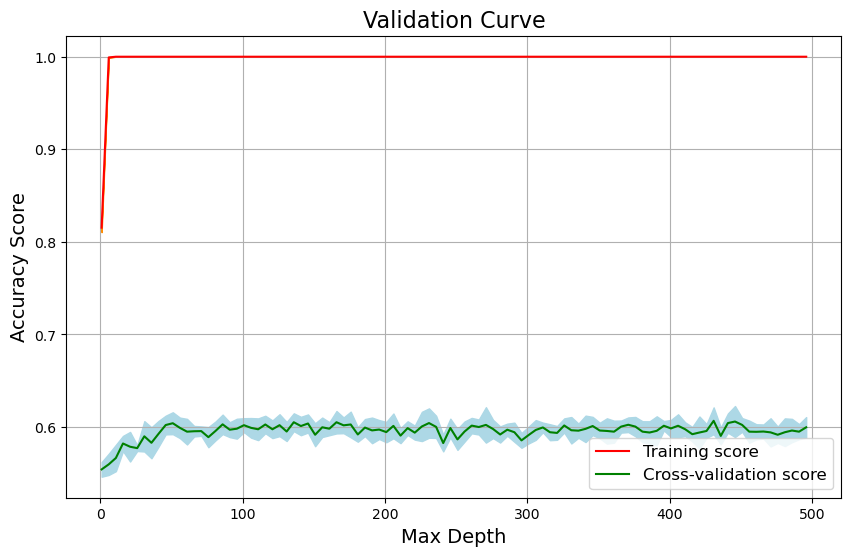

In [410]:
param_range = np.arange(1, 500, 5)
train_scores, test_scores = validation_curve(bdt_1, X1_train, y1_train, param_name="n_estimators", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

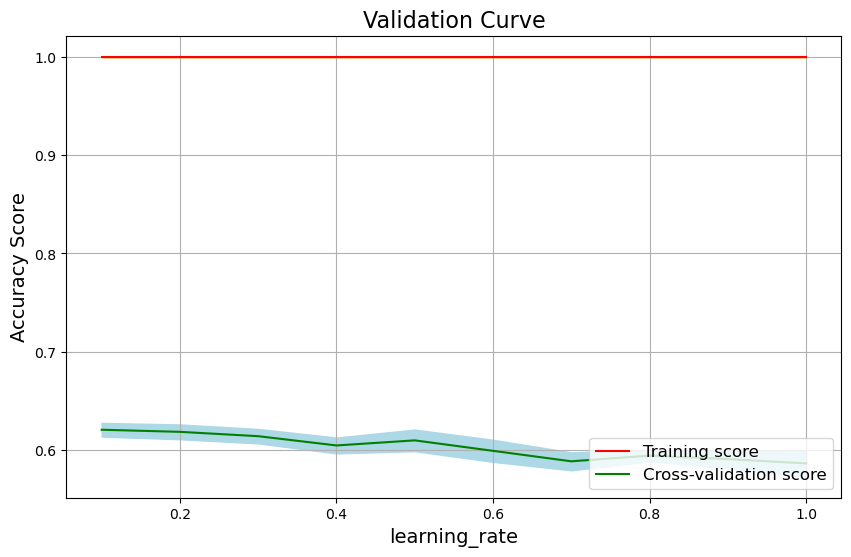

In [411]:
param_range = np.arange(0.1, 1.1, 0.1)

train_scores, test_scores = validation_curve(bdt_1, X1_train, y1_train, param_name="learning_rate", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("learning_rate", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

### Dataset 2

In [398]:
start_time = time.perf_counter()

In [399]:
# Boosted Decision Tree
bdt_2 = GradientBoostingClassifier(n_estimators=300,learning_rate=0.7,max_depth=300,min_samples_leaf=6,subsample=0.9)
bdt_2.fit(X2_train, y2_train)
bdt_2_pred = bdt_2.predict(X2_test)
print(classification_report(y2_test, bdt_2_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       775
           1       0.50      0.65      0.56       389

    accuracy                           0.66      1164
   macro avg       0.65      0.66      0.65      1164
weighted avg       0.69      0.66      0.67      1164


In [400]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 6.7198 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

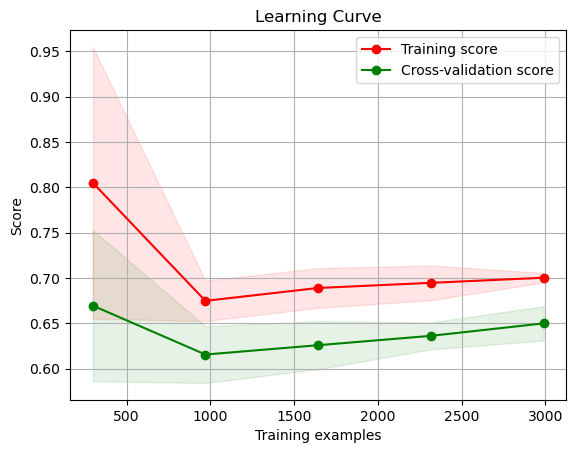

In [367]:
def plot_learning_curve(bdt_2, title, X2, y2, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        bdt_2, X2, y2, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(bdt_2, "Learning Curve", X2_train, y2_train, cv=7)

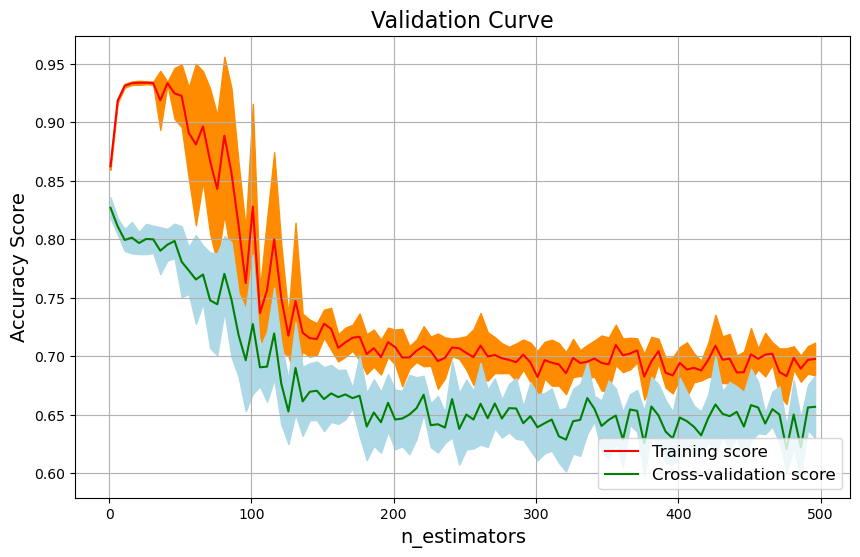

In [412]:
param_range = np.arange(1, 500, 5)
train_scores, test_scores = validation_curve(bdt_2, X2_train, y2_train, param_name="n_estimators", param_range=param_range,
                                             cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("n_estimators", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

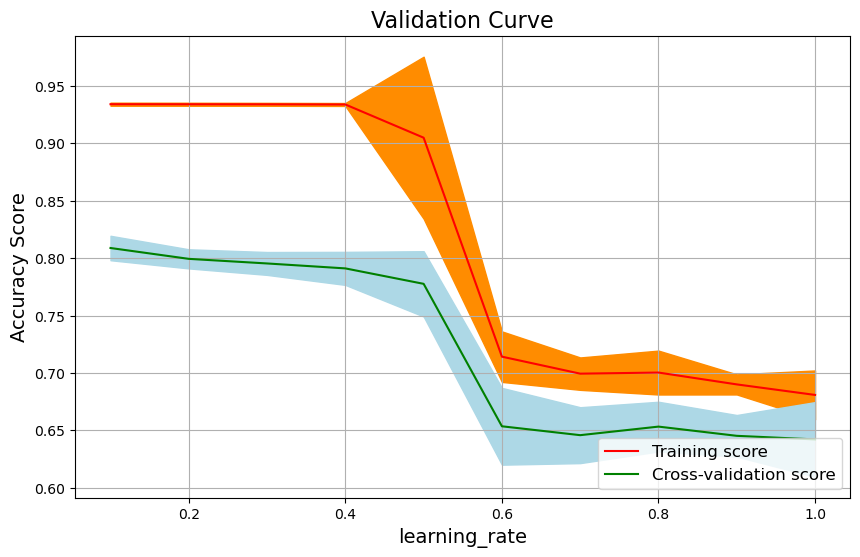

In [413]:
param_range = np.arange(0.1, 1.1, 0.1)
train_scores, test_scores = validation_curve(bdt_2, X2_train, y2_train, param_name="learning_rate",
                                             param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("learning_rate", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# Support Vector Machine

### Dataset 1

In [414]:
start_time = time.perf_counter()

In [415]:
svm_1 = SVC(kernel='poly', class_weight='balanced',C=0.5,degree=5)
svm_1.fit(X1_train, y1_train)
svm_1_pred = svm_1.predict(X1_test)
print(classification_report(y1_test, svm_1_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      1415
           1       0.36      0.19      0.25       776

    accuracy                           0.59      2191
   macro avg       0.50      0.50      0.48      2191
weighted avg       0.54      0.59      0.55      2191


In [416]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 6.0196 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

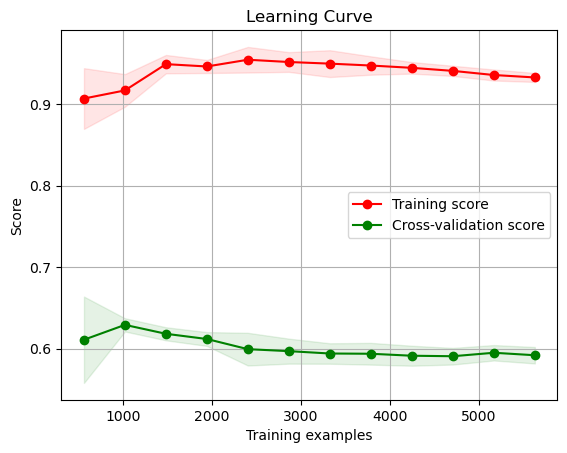

In [418]:
def plot_learning_curve(svm_1, title, X1, y1, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 12)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        svm_1, X1, y1, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(svm_1, "Learning Curve", X1_train, y1_train, cv=7)

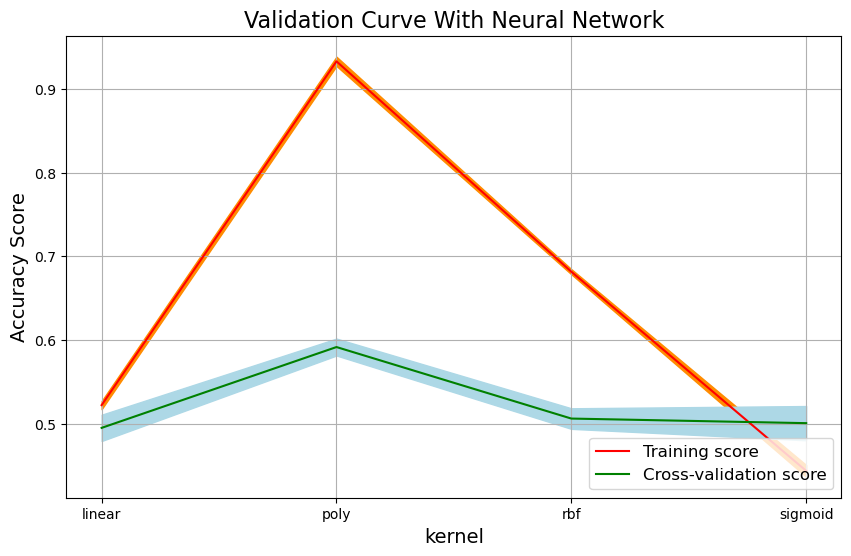

In [428]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(svm_1, X1_train, y1_train, param_name="kernel", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve With Neural Network", fontsize=16)
plt.xlabel("kernel", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

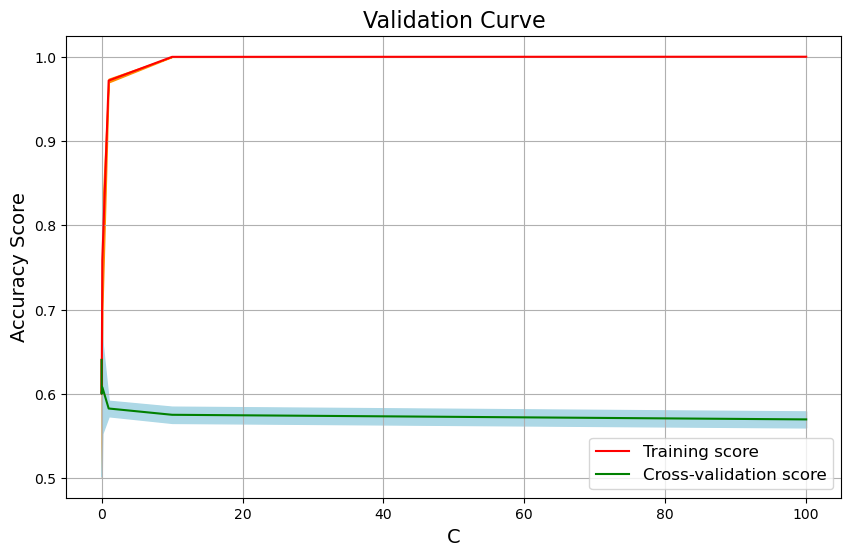

In [427]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(svm_1, X1_train, y1_train, param_name="C", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("C", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

### Dataset 2

In [ ]:
start_time = time.perf_counter()

In [421]:
svm_2 = SVC(kernel='poly', class_weight='balanced',C=0.5,degree=5)
svm_2.fit(X2_train, y2_train)
svm_2_pred = svm_2.predict(X2_test)
print("SVM:", classification_report(y2_test, svm_2_pred))

SVM:               precision    recall  f1-score   support

           0       0.82      0.94      0.88       775
           1       0.84      0.59      0.69       389

    accuracy                           0.82      1164
   macro avg       0.83      0.76      0.78      1164
weighted avg       0.82      0.82      0.81      1164


In [422]:
end_time = time.perf_counter()

wall_clock_time = end_time - start_time

print(f"Wall clock time for decision tree training: {wall_clock_time:.4f} seconds")

Wall clock time for decision tree training: 1656.8930 seconds


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

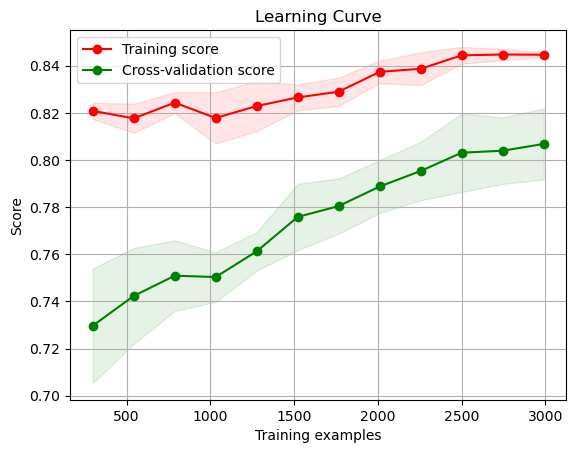

In [423]:
def plot_learning_curve(svm_2, title, X2, y2, ylim=None, cv=7, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 12)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        svm_2, X2, y2, cv=7, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(svm_2, "Learning Curve", X2_train, y2_train, cv=7)

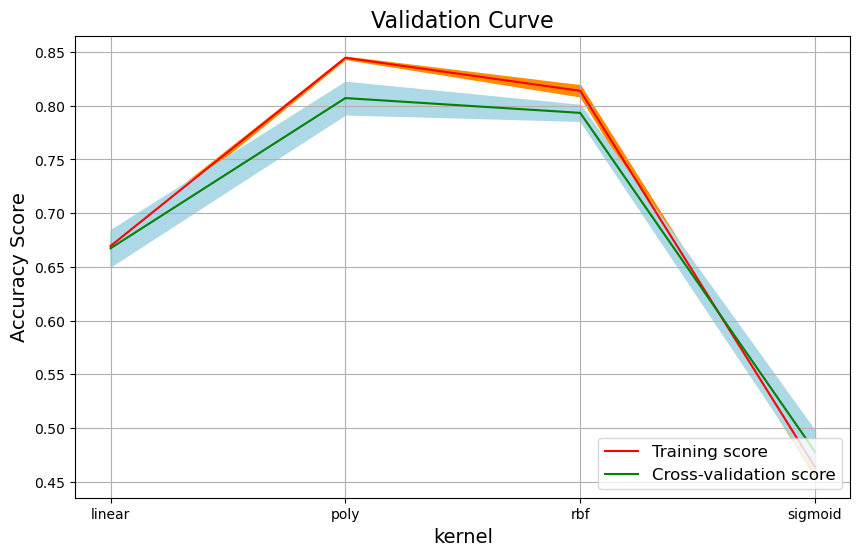

In [426]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(svm_2, X2_train, y2_train, param_name="kernel", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("kernel", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

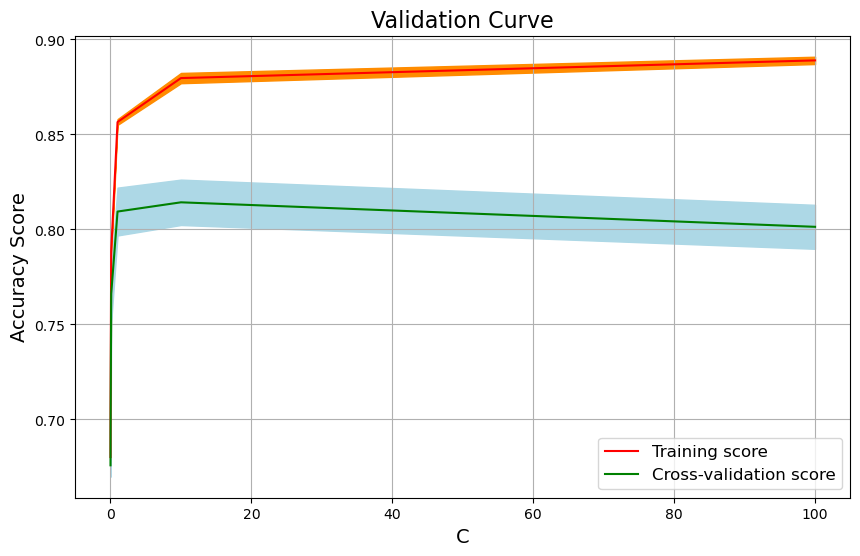

In [425]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(svm_2, X2_train, y2_train, param_name="C", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="DarkOrange")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="LightBlue")

plt.title("Validation Curve", fontsize=16)
plt.xlabel("C", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()